In [6]:
import numpy as np
%load_ext autoreload
%autoreload 2
import dsp_lib
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def upscale_to_i16(signal):
    max_i16 = 32767
    print(max(signal))
    print(max(signal.real))
    print(max(signal.imag))
    coeff = max_i16 / max(max(signal.real), max(signal.imag))
    print(coeff)
    return signal * np.floor(coeff)

def downscale_to_i16(signal):
    max_i16 = 32767
    print(max(signal))
    print(max(signal.real))
    print(max(signal.imag))
    coeff = max_i16 / max(max(signal.real), max(signal.imag))
    print(coeff)
    return signal * (coeff)

In [8]:
file_path = "qpsk_rrc_int16.bin"
data_type = 'int16'

source_samples = dsp_lib.read_signal(file_path, data_type, 0, 0, '')

[[18553]
 [ 6528]
 [-3303]
 [11166]
 [20457]
 [ 6024]
 [-2233]
 [10389]
 [17413]
 [ 5479]]


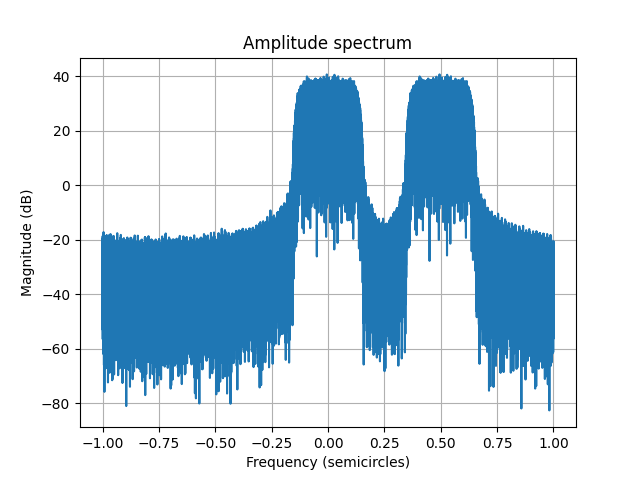

array([[-52.78182226],
       [-25.85354024],
       [-29.23160691],
       ...,
       [-20.55042534],
       [-32.30233844],
       [-27.48130532]])

In [9]:
sig = dsp_lib.make_cmplx_sig(source_samples)
dsp_lib.plot_spectrum(sig, 0)

In [10]:
N = 129
Fs = 1
T_symb = 8
s_rrc = dsp_lib.gen_rrc_filter_impulse_response(N, Fs, T_symb)

[44104.06855703-30678.74022139j 52721.10317825-37242.94990835j
 60083.80145639-43149.8033332j  65656.59252807-48135.16201822j
 69011.36349227-52333.15866705j 70188.45674543-56070.13532562j
 69503.80056819-59506.14229861j 67260.59104547-62754.711477j
 63881.05633382-66021.85026881j 60017.44145705-69389.37199477j]
[-40554.94272799-22311.26296839j -51360.95186683-42302.19663249j
 -58133.44895398-57982.82789026j -60643.38065721-68029.43432102j
 -58972.6737776 -71804.03280744j -53690.40610871-69377.56161802j
 -45752.75560664-61671.36480638j -36145.65067192-50220.20435207j
 -25855.72983081-36683.53683096j -15980.95512659-22739.93511868j]


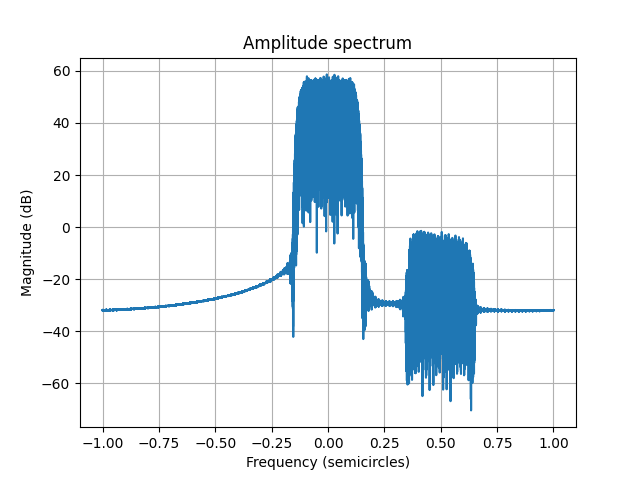

In [11]:
sig_rrc = np.convolve(sig, s_rrc, 'same')
print(sig_rrc[:10])
print(sig_rrc[len(sig_rrc) - 10:])
dsp_lib.plot_spectrum(sig_rrc, 1)
dsp_lib.save_cmplx_sig(sig_rrc, "qpsk_rrc_after_py_rrc_fl64.bin", 'float64')

In [15]:
a = np.full(6, 2)
b = np.full(6, 4)
ab = np.hstack((a, b))
print(a)
print(b)
print(ab)
sig_len = len(ab)
print(sig_len)
half_fil = 2
print(ab[2: 8])
print(ab[: int(len(ab) - np.floor(half_fil) -1)])
print(ab[int(sig_len / 2) - half_fil : int(sig_len)])
print(f"last_idx  = {int(sig_len / 2) + half_fil}") 
print(f"first_idx = {int(sig_len / 2) - half_fil}") 

[2 2 2 2 2 2]
[4 4 4 4 4 4]
[2 2 2 2 2 2 4 4 4 4 4 4]
12
[2 2 2 2 4 4]
[2 2 2 2 2 2 4 4 4]
[2 2 4 4 4 4 4 4]
last_idx  = 8
first_idx = 4


sig len = 1032000, rrc len = 129
sig rrc0.len = 516064, sig_rrc1.len = 516064
max diff of partional convs is 0j


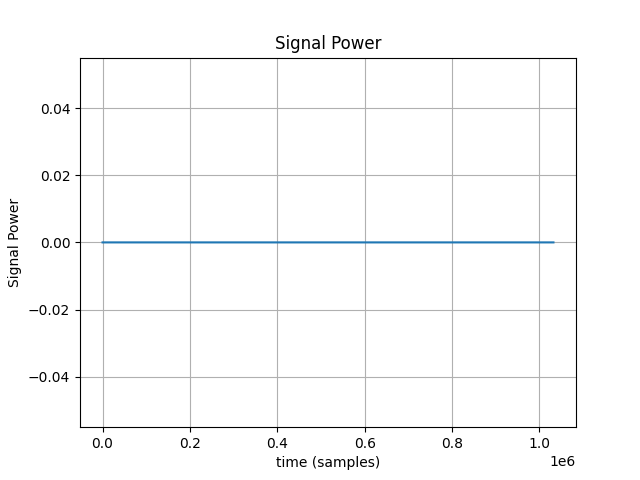

In [18]:
sig_len = len(sig)
rrc_len = len(s_rrc)
print(f"sig len = {sig_len}, rrc len = {rrc_len}")
sig0 = sig[: int(np.floor(sig_len / 2) + np.floor(rrc_len / 2))]
sig1 = sig[int(np.floor(sig_len / 2) - np.floor(rrc_len / 2) ) : int(sig_len)]
sig_rrc0 = np.convolve(sig0, s_rrc, 'same')
sig_rrc1 = np.convolve(sig1, s_rrc, 'same')
print(f"sig rrc0.len = {len(sig_rrc0)}, sig_rrc1.len = {len(sig_rrc1)}")

sum_sig_rrc = np.hstack((sig_rrc0[: int(len(sig0) - np.floor(rrc_len / 2))], sig_rrc1[int(rrc_len / 2) :]))
diff = sig_rrc - sum_sig_rrc[:len(sum_sig_rrc)]
print(f"max diff of partional convs is {max(diff)}")
dsp_lib.plot_signal(abs(diff), 4)

In [19]:
print(len(sum_sig_rrc))

1032000


In [105]:
int(len(sig0) - np.floor(rrc_len / 2) -1)
int(rrc_len / 2)

64

[-40554.94 -22311.266j -51360.945-42302.195j -58133.45 -57982.83j
 -60643.383-68029.43j  -58972.676-71804.03j  -53690.414-69377.56j
 -45752.758-61671.367j -36145.652-50220.207j -25855.73 -36683.54j
 -15980.955-22739.936j]


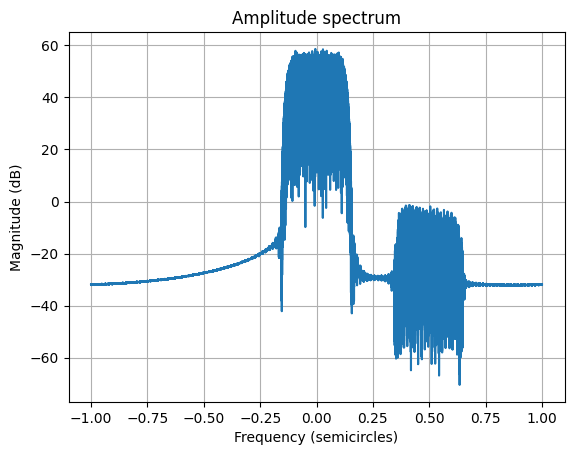

[-0.00527526 -0.00399103 -0.00164843  0.00129551]
[-0.00527526 -0.00399103 -0.00164843  0.00129551]
<class 'numpy.float64'>
9.253751671184363e-11


In [64]:
sig_fl32 = np.array(sig,  dtype=np.csingle)
s_rrc_fl32 = np.array(s_rrc, dtype = np.float32)
sig_rrc_fl32 = np.convolve(sig_fl32, s_rrc_fl32, 'same')
print(sig_rrc_fl32[len(sig_rrc_fl32) - 10:])
dsp_lib.save_cmplx_sig(sig_rrc_fl32, "qpsk_rrc_after_py_rrc_fl32.bin", data_type='float32')
dsp_1032000,lib.plot_spectrum(sig_rrc_fl32, 2)
print(s_rrc[:4])
print(s_rrc_fl32[:4])
print(type(s_rrc[0]))
print(s_rrc[0] - s_rrc_fl32[0])

In [65]:
sig_rrc_scaled = downscale_to_i16(sig_rrc)
max(sig_rrc_scaled)

(118159.29718780753+764.31398711851j)
118159.29718780753
118345.16559443541
0.27687654020690056


(32715.537398639106+211.6206123851146j)

In [66]:
max(sig_rrc)

(118159.29718780753+764.31398711851j)

In [67]:
sig_rrc[-10:]

array([-40554.94272799-22311.26296839j, -51360.95186683-42302.19663249j,
       -58133.44895398-57982.82789026j, -60643.38065721-68029.43432102j,
       -58972.6737776 -71804.03280744j, -53690.40610871-69377.56161802j,
       -45752.75560664-61671.36480638j, -36145.65067192-50220.20435207j,
       -25855.72983081-36683.53683096j, -15980.95512659-22739.93511868j])

In [68]:
len(sig_rrc_fl32)

1032000